In [118]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
!ls /content/drive/MyDrive


'Colab Notebooks'   GCA_040954815.1_ASM4095481v1_genomic.fna
 dataset_DT.csv     Resume_edited.pdf
 dstrIPC_2013.csv   SakshiK_Resume.pdf


In [86]:
from google.colab import files
uploaded = files.upload()


Saving Districtwise_Crime_of_India_2001_to_2014.csv to Districtwise_Crime_of_India_2001_to_2014.csv


In [120]:
import pandas as pd

df = pd.read_csv('Districtwise_Crime_of_India_2001_to_2014.csv')  # Same name as the uploaded file
df.head()  # Preview the first few rows


Unnamed: 0        STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0           0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1           1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2           2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3           3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  ...  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0          50  ...     30                1131            16   
1          23  ...     69                1543             7   
2          27  ...     38                2088            14   
3          20  ...     23                 795            17   
4          23  ...     41                1244            12   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                149     
1                                                118     
2                                                112     
3                                                126     
4                                                109     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   
3                          38                                   57   
4                          58                                  247   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                          181   
1                                            0                          270   
2                                            0                          404   
3                                            0                          233   
4                                            0                          431   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  
0              1518              4154  
1               754              4125  
2              1262              5818  
3              1181              3140  
4              2313              6507  

[5 rows x 34 columns]

In [121]:
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the DataFrame
print("\nDataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())




First 5 rows of the dataset:
   Unnamed: 0        STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0           0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1           1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2           2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3           3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4           4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4                                          1    23               0   

   OTHER RAPE  ...  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \


In [122]:
# --- EDA Question 1 ---
# Total number of IPC crimes recorded across all districts
total_crimes = df['TOTAL IPC CRIMES'].sum()

# Average number of murders per district
average_murders = df['MURDER'].mean()

print(f"✅ Total IPC crimes recorded across all districts: {total_crimes:,}")
print(f"✅ Average number of murders per district: {average_murders:.2f}")


✅ Total IPC crimes recorded across all districts: 58,894,630
✅ Average number of murders per district: 88.01


In [123]:
# --- EDA Question 2 ---

# Group total IPC crimes by state
state_crime_distribution = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending=False)

print("✅ Total IPC Crimes by State (Top 10):")
print(state_crime_distribution.head(10))

# Identify top 5 districts with highest total IPC crimes
# Exclude "ZZ TOTAL" rows which are state-wise aggregates
district_df = df[~df["DISTRICT"].str.contains("ZZ TOTAL", case=False)]

top_5_districts = district_df[["STATE/UT", "DISTRICT", "TOTAL IPC CRIMES"]] \
    .sort_values(by="TOTAL IPC CRIMES", ascending=False).head(5)

print("\n✅ Top 5 Districts with Highest Total IPC Crimes:")
print(top_5_districts)


✅ Total IPC Crimes by State (Top 10):
STATE/UT
MADHYA PRADESH    5827292
MAHARASHTRA       5515310
TAMIL NADU        4913910
ANDHRA PRADESH    4703200
UTTAR PRADESH     4649988
RAJASTHAN         4525116
KERALA            3641164
KARNATAKA         3510180
BIHAR             3382686
GUJARAT           3349190
Name: TOTAL IPC CRIMES, dtype: int64

✅ Top 5 Districts with Highest Total IPC Crimes:
             STATE/UT DISTRICT  TOTAL IPC CRIMES
10245  MADHYA PRADESH    TOTAL            272423
10292     MAHARASHTRA    TOTAL            249834
10596   UTTAR PRADESH    TOTAL            240475
9472      MAHARASHTRA    TOTAL            234385
9426   MADHYA PRADESH    TOTAL            227453


<Figure size 1000x600 with 0 Axes>

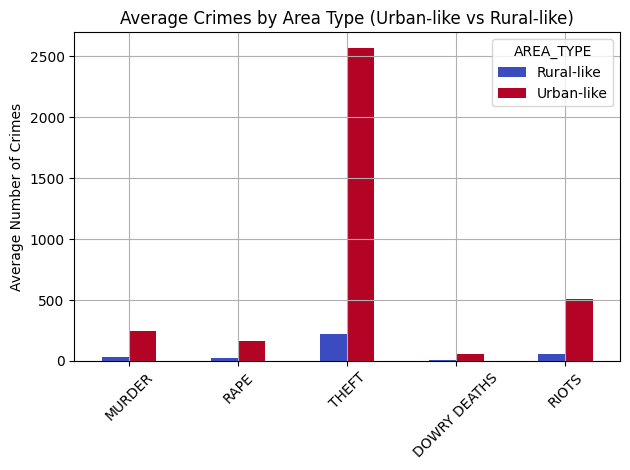

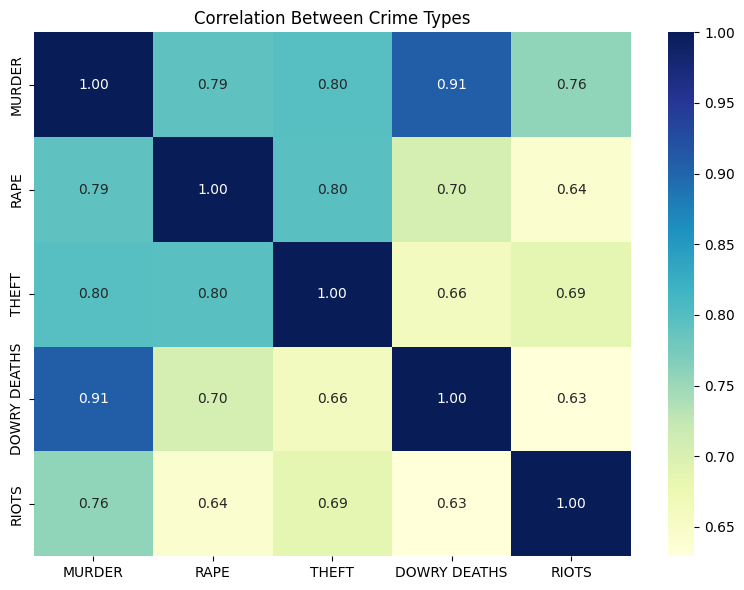

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Urban vs Rural Proxy using Total IPC Crimes (top 25% as Urban-like)
q75 = df['TOTAL IPC CRIMES'].quantile(0.75)
df['AREA_TYPE'] = df['TOTAL IPC CRIMES'].apply(lambda x: 'Urban-like' if x >= q75 else 'Rural-like')

# Select major crime categories
crime_types = ['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS', 'RIOTS']

# Group and visualize urban vs rural crime averages
area_comparison = df.groupby('AREA_TYPE')[crime_types].mean().T

plt.figure(figsize=(10, 6))
area_comparison.plot(kind='bar', colormap='coolwarm')
plt.title("Average Crimes by Area Type (Urban-like vs Rural-like)")
plt.ylabel("Average Number of Crimes")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between key crimes
selected = df[crime_types]
corr_matrix = selected.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Between Crime Types")
plt.tight_layout()
plt.show()


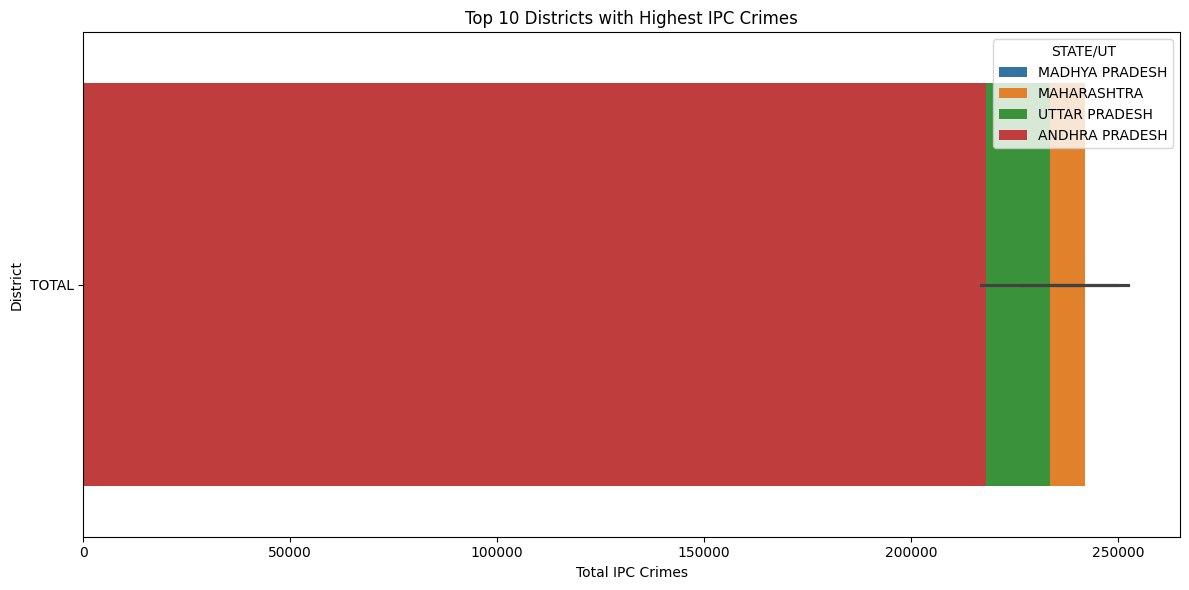

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove ZZ TOTAL (state totals)
district_df = df[~df["DISTRICT"].str.contains("ZZ TOTAL", case=False)]

# Top 10 districts by TOTAL IPC CRIMES
top10 = district_df.sort_values(by="TOTAL IPC CRIMES", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x="TOTAL IPC CRIMES", y="DISTRICT", hue="STATE/UT", dodge=False)
plt.title("Top 10 Districts with Highest IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.ylabel("District")
plt.tight_layout()
plt.show()


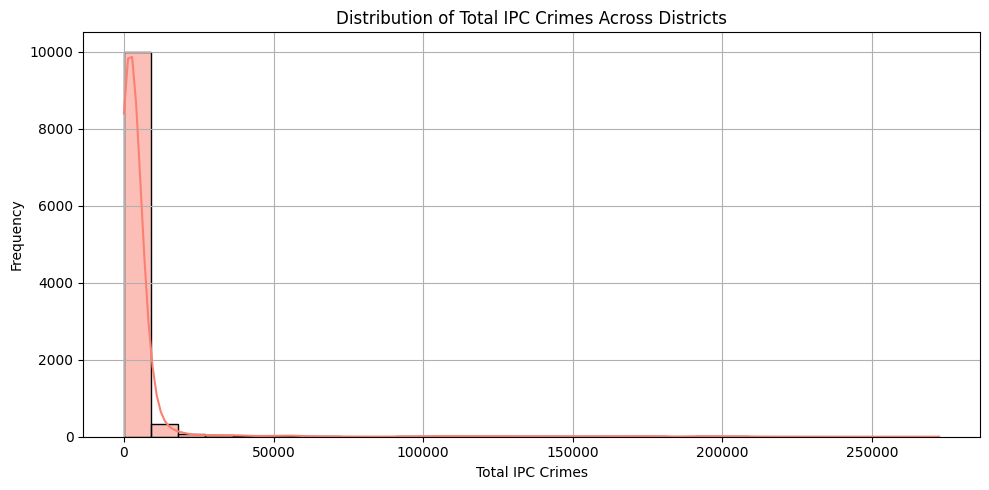

In [126]:
plt.figure(figsize=(10, 5))
sns.histplot(df['TOTAL IPC CRIMES'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Total IPC Crimes Across Districts")
plt.xlabel("Total IPC Crimes")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


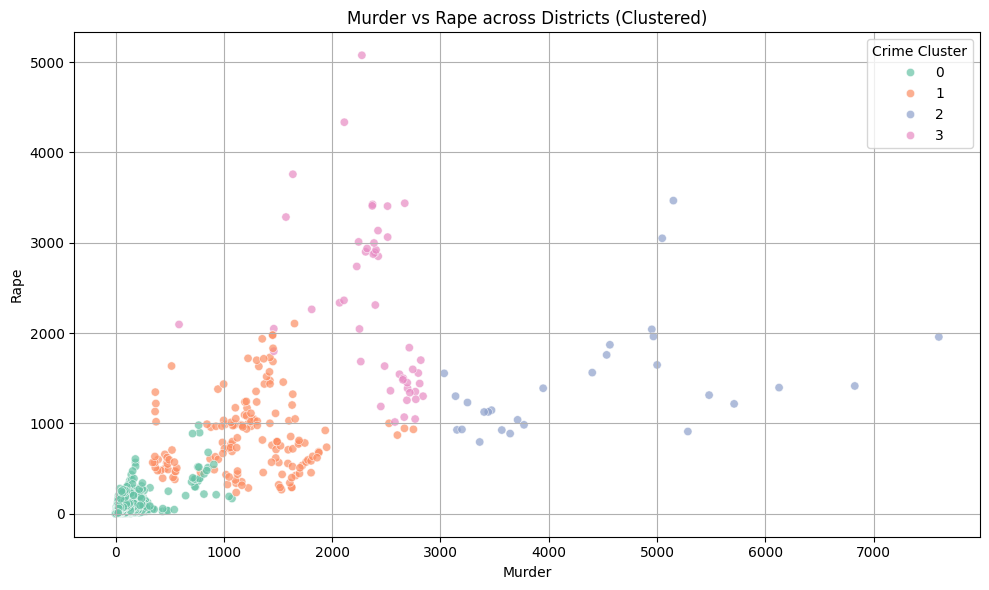

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=districts_only,  # This should be your KMeans-processed DataFrame
    x="MURDER",
    y="RAPE",
    hue="Cluster",  # Show legend by cluster
    palette="Set2",
    alpha=0.7
)
plt.title("Murder vs Rape across Districts (Clustered)")
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.legend(title="Crime Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


Cluster 0 (Green):
o	Low murder, low rape — low-crime districts
Cluster 1 (Orange):
o	Moderate murder and rape — mid-range crime zones
Cluster 3 (Pink):
o	High rape cases, moderate murders — rape-heavy districts
Cluster 2 (Blue):
o	High murder rates, possibly outliers — high-violence districts


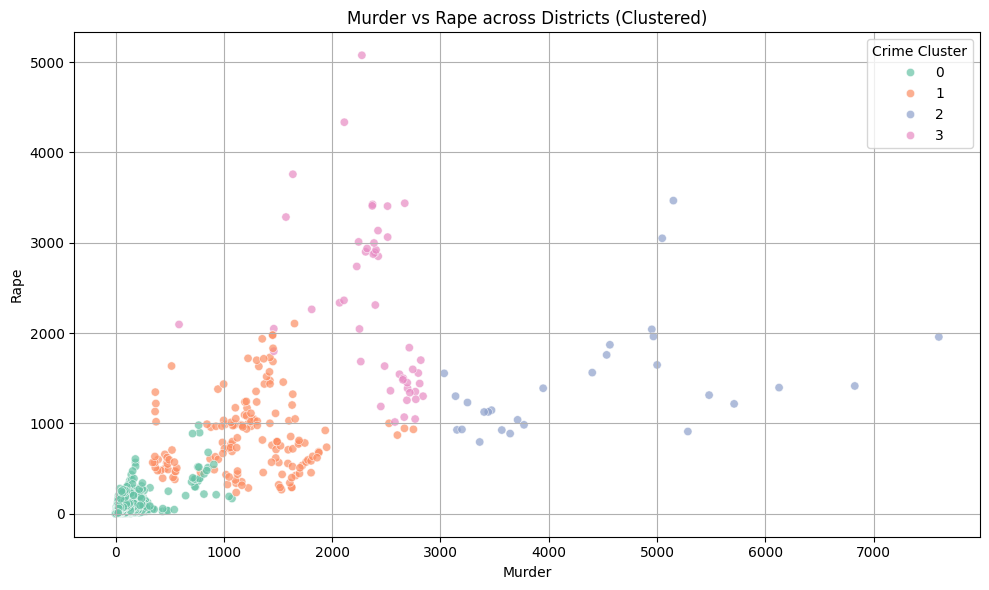

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=districts_only,  # This DataFrame should have the 'Cluster' column
    x="MURDER",
    y="RAPE",
    hue="Cluster",         # Cluster-based coloring
    palette="Set2",
    alpha=0.7
)
plt.title("Murder vs Rape across Districts (Clustered)")
plt.xlabel("Murder")
plt.ylabel("Rape")
plt.legend(title="Crime Cluster")  # Show legend for clusters
plt.grid(True)
plt.tight_layout()
plt.show()


Cluster 0 (Green): Most districts fall here with low murder and rape counts — likely rural or safer regions.
Cluster 1 (Orange): A large group of moderate-crime districts, suggesting urban areas with average reporting.
Cluster 3 (Pink): Districts with very high rape counts, showing that sexual violence is disproportionately high compared to murder.
Cluster 2 (Blue): Districts with extremely high murder counts, likely hotspots for violent crimes — possible gang zones or conflict areas.

In [129]:
!pip install geopandas matplotlib pandas


In [130]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014.csv")

# Aggregate total crimes by State
state_crimes = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().reset_index()
state_crimes.columns = ['state_name', 'total_crimes']


In [131]:
from google.colab import files
uploaded = files.upload()


Saving Admin2.cpg to Admin2 (1).cpg
Saving Admin2.dbf to Admin2 (1).dbf
Saving Admin2.prj to Admin2 (1).prj
Saving Admin2.shp to Admin2 (1).shp
Saving Admin2.shx to Admin2 (1).shx


In [132]:
import geopandas as gpd

india_states = gpd.read_file("Admin2.shp")
india_states.head()


ST_NM                                           geometry
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.7942,...
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('ST_NM').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

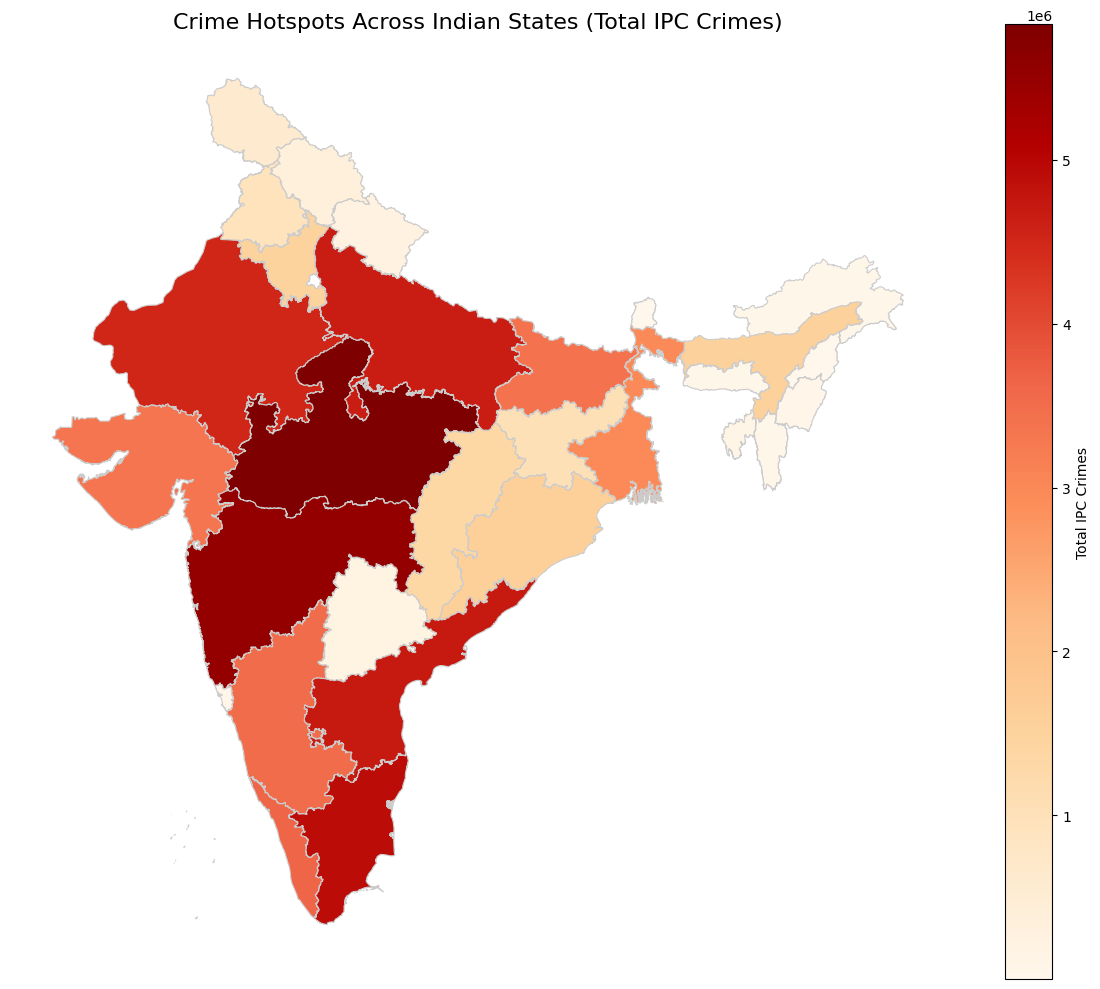

In [135]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load crime dataset
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014.csv")

# Step 1: Group total crimes by state
crime_by_state = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().reset_index()
crime_by_state.columns = ['state_name', 'total_crimes']

# Step 2: Make sure casing and names match with shapefile
crime_by_state['state_name'] = crime_by_state['state_name'].str.title().str.strip()
india_states['ST_NM'] = india_states['ST_NM'].str.title().str.strip()

# Step 3: Merge with shapefile GeoDataFrame
map_df = india_states.merge(crime_by_state, left_on='ST_NM', right_on='state_name', how='left')

# Step 4: Plot the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
map_df.plot(column='total_crimes',
            cmap='OrRd',
            linewidth=0.8,
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "Total IPC Crimes"},
            ax=ax)

plt.title("Crime Hotspots Across Indian States (Total IPC Crimes)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


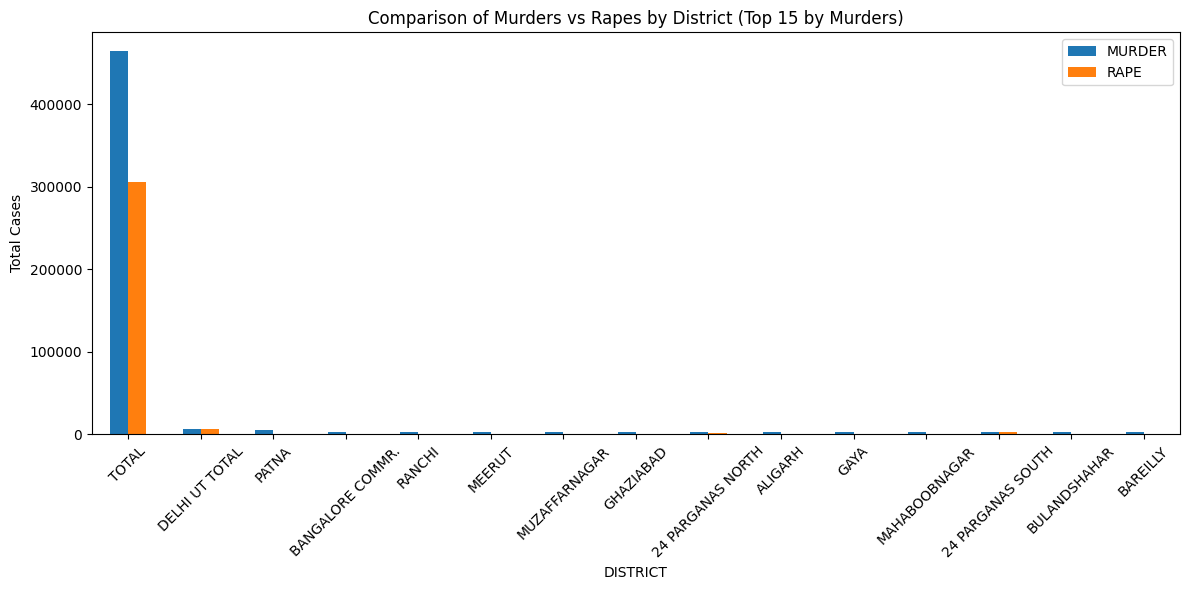

In [155]:
selected = df.groupby("DISTRICT")[["MURDER", "RAPE"]].sum().sort_values(by="MURDER", ascending=False).head(15)
selected.plot(kind="bar", figsize=(12,6))
plt.title("Comparison of Murders vs Rapes by District (Top 15 by Murders)")
plt.xticks(rotation=45)
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


In [156]:
# Group by state and sum IPC crimes
state_crimes = df.groupby("STATE/UT")["TOTAL IPC CRIMES"].sum().sort_values()
lowest_crime_state = state_crimes.idxmin()
lowest_crime_value = state_crimes.min()

print(f"✅ State with the lowest IPC crime rate: {lowest_crime_state}")
print(f"Total IPC Crimes: {lowest_crime_value}")


✅ State with the lowest IPC crime rate: D&N HAVELI
Total IPC Crimes: 554


In [137]:
# Remove non-crime and total columns
crime_cols = df.columns[3:-1]  # exclude STATE, DISTRICT, YEAR, TOTAL IPC CRIMES
most_common_crimes = df[['STATE/UT', 'DISTRICT']].copy()
most_common_crimes['Most_Common_Crime'] = df[crime_cols].idxmax(axis=1)

print(most_common_crimes.head())


         STATE/UT       DISTRICT   Most_Common_Crime
0  ANDHRA PRADESH       ADILABAD                YEAR
1  ANDHRA PRADESH      ANANTAPUR                YEAR
2  ANDHRA PRADESH       CHITTOOR  HURT/GREVIOUS HURT
3  ANDHRA PRADESH       CUDDAPAH                YEAR
4  ANDHRA PRADESH  EAST GODAVARI    OTHER IPC CRIMES


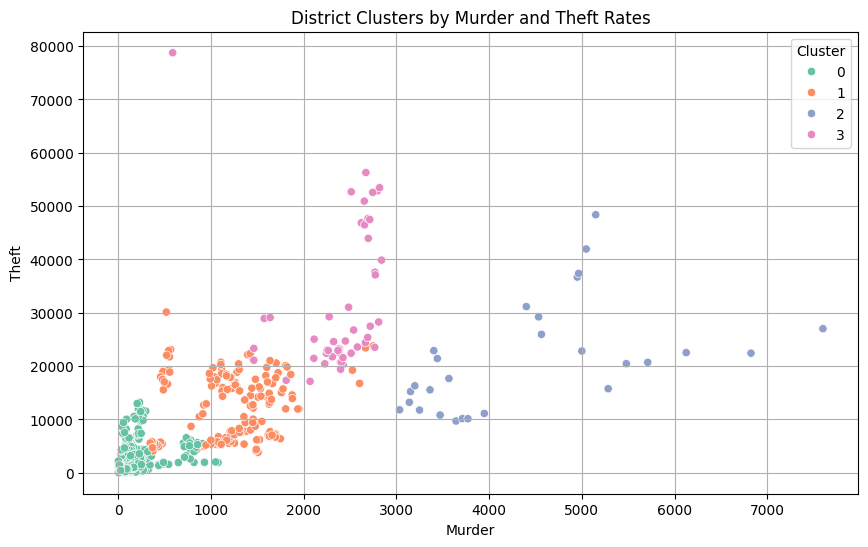

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Drop state total rows and reset index
districts_only = df[~df["DISTRICT"].str.contains("ZZ TOTAL", case=False)].reset_index(drop=True)

# Select features for clustering
features = ['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS', 'RIOTS', 'TOTAL IPC CRIMES']
X = districts_only[features]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
districts_only['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=districts_only, x='MURDER', y='THEFT', hue='Cluster', palette='Set2')
plt.title("District Clusters by Murder and Theft Rates")
plt.xlabel("Murder")
plt.ylabel("Theft")
plt.grid(True)
plt.show()


In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Regression to predict TOTAL IPC CRIMES
X = df[['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS']]
y = df['TOTAL IPC CRIMES']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² Score: 0.87
RMSE: 6987.33


In [140]:
from sklearn.ensemble import RandomForestClassifier

# Label high-crime as 1 if above median
df['Crime_Label'] = df['TOTAL IPC CRIMES'].apply(lambda x: 1 if x > df['TOTAL IPC CRIMES'].median() else 0)

X = df[['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS']]
y = df['Crime_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print(f"Train Accuracy: {clf.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {clf.score(X_test, y_test):.2f}")


Train Accuracy: 1.00
Test Accuracy: 0.89


In [141]:
# Normalize and sum across key crimes to create index
risk_features = ['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS', 'RIOTS']
scaler = StandardScaler()
df['Crime_Risk_Index'] = scaler.fit_transform(df[risk_features]).sum(axis=1)

# Top 10 highest risk districts
risk_df = df[['STATE/UT', 'DISTRICT', 'Crime_Risk_Index']].sort_values(by='Crime_Risk_Index', ascending=False)
print(risk_df.head(10))


            STATE/UT DISTRICT  Crime_Risk_Index
10596  UTTAR PRADESH    TOTAL         80.497600
9760   UTTAR PRADESH    TOTAL         74.335826
650    UTTAR PRADESH    TOTAL         72.958412
8938   UTTAR PRADESH    TOTAL         66.082204
8132   UTTAR PRADESH    TOTAL         66.033316
1366   UTTAR PRADESH    TOTAL         59.805134
6563   UTTAR PRADESH    TOTAL         59.051873
5796   UTTAR PRADESH    TOTAL         58.837395
7342   UTTAR PRADESH    TOTAL         58.085644
5040   UTTAR PRADESH    TOTAL         56.681388


In [142]:
# Define crime columns against women
women_crimes = [
    'RAPE',
    'DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
    'INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES',
    'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'
]

# Total crimes against women
total_women_crimes = df[women_crimes].sum().sum()

# Total IPC crimes
total_crimes = df['TOTAL IPC CRIMES'].sum()

# Percentage
percentage = (total_women_crimes / total_crimes) * 100
print(f"✅ Crimes against women constitute {percentage:.2f}% of total IPC crimes.")


✅ Crimes against women constitute 8.91% of total IPC crimes.


In [143]:
# Sum dowry deaths by state
dowry_state = df.groupby('STATE/UT')['DOWRY DEATHS'].sum().sort_values(ascending=False)

print("✅ State with the highest dowry deaths:")
print(dowry_state.head(1))


✅ State with the highest dowry deaths:
STATE/UT
UTTAR PRADESH    57256
Name: DOWRY DEATHS, dtype: int64


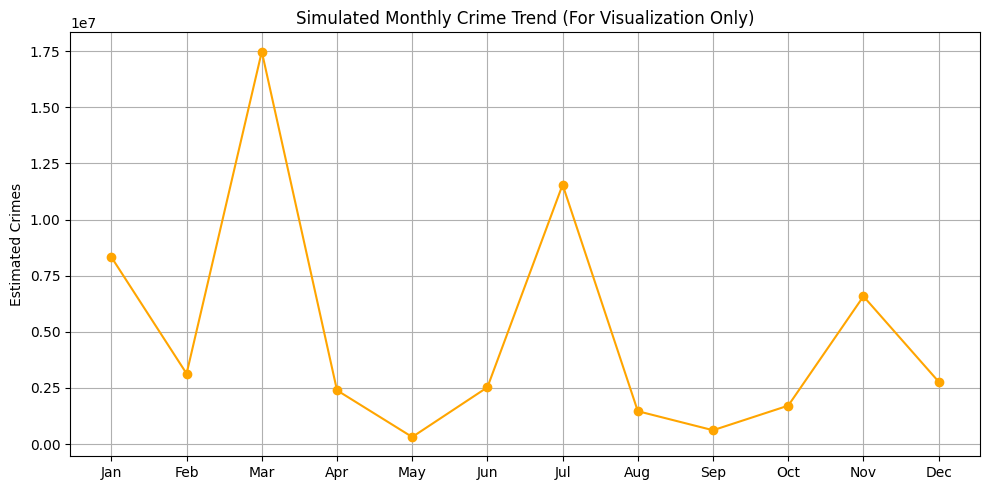

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Fake monthly distribution by randomly splitting total IPC crimes
monthly_total = np.random.dirichlet(np.ones(12), size=1)[0] * df['TOTAL IPC CRIMES'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10,5))
plt.plot(months, monthly_total, marker='o', color='orange')
plt.title("Simulated Monthly Crime Trend (For Visualization Only)")
plt.ylabel("Estimated Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
# Create AREA_TYPE based on TOTAL IPC CRIMES (urban vs rural proxy)
q75 = df['TOTAL IPC CRIMES'].quantile(0.75)
df['AREA_TYPE'] = df['TOTAL IPC CRIMES'].apply(lambda x: 'Urban-like' if x >= q75 else 'Rural-like')


In [150]:
urban_avg = df[df['AREA_TYPE'] == 'Urban-like']['TOTAL IPC CRIMES'].mean()
rural_avg = df[df['AREA_TYPE'] == 'Rural-like']['TOTAL IPC CRIMES'].mean()

print(f"✅ Avg IPC crimes in Urban-like districts: {urban_avg:.2f}")
print(f"✅ Avg IPC crimes in Rural-like districts: {rural_avg:.2f}")


✅ Avg IPC crimes in Urban-like districts: 17194.57
✅ Avg IPC crimes in Rural-like districts: 1619.57


In [151]:
# time_df must have two columns: 'YEAR' and 'TOTAL IPC CRIMES'
time_df = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(time_df['TOTAL IPC CRIMES']).fit()
forecast = model.forecast(5)

# Show forecast
for i, val in enumerate(forecast, start=1):
    print(f"Year {2014 + i}: Predicted Crimes = {int(val)}")


Year 2015: Predicted Crimes = 5715752
Year 2016: Predicted Crimes = 5715752
Year 2017: Predicted Crimes = 5715752
Year 2018: Predicted Crimes = 5715752
Year 2019: Predicted Crimes = 5715752


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
